In [1]:
import numpy as np
import pandas as pd
import sqlite3
import io
import math
import pdb

In [2]:
acoustic_features = pd.read_csv("SpotifyFeatures.csv")

In [7]:
with pd.option_context("display.max_columns", 20):
	print(acoustic_features.head())

   genre      artist_name                                         track_name  \
0  Opera   Giuseppe Verdi  Stiffelio, Act III: Ei fugge! … Lina, pensai c...   
1  Opera  Giacomo Puccini  Madama Butterfly / Act 1: ... E soffitto e pareti   
2  Opera  Giacomo Puccini      Turandot / Act 2: Gloria, gloria, o vincitore   
3  Opera   Giuseppe Verdi       Rigoletto, Act IV: Venti scudi hai tu detto?   
4  Opera   Giuseppe Verdi           Don Carlo / Act 4: "Ella giammai m'amò!"   

                 track_id  popularity  acousticness  danceability  \
0  7EsKYeHtTc4H4xWiTqSVZA          21         0.986         0.313   
1  7MfmRBvqaW0I6UTxXnad8p          18         0.972         0.360   
2  7pBo1GDhIysyUMFXiDVoON          10         0.935         0.168   
3  02mvYZX5aKNzdqEo6jF20m          17         0.961         0.250   
4  03TW0jwGMGhUabAjOpB1T9          19         0.985         0.142   

   duration_ms   energy  instrumentalness key  liveness  loudness   mode  \
0       490867  0.23100     

   popularity  acousticness  danceability  duration_ms   energy  \
0          21         0.986         0.313       490867  0.23100   
1          18         0.972         0.360       176797  0.20100   
2          10         0.935         0.168       266184  0.47000   
3          17         0.961         0.250       288573  0.00605   
4          19         0.985         0.142       629760  0.05800   

   instrumentalness  liveness  loudness  speechiness    tempo  valence  
0          0.000431    0.0964   -14.287       0.0547   86.001   0.0886  
1          0.028000    0.1330   -19.794       0.0581  131.798   0.3690  
2          0.020400    0.3630    -8.415       0.0383   75.126   0.0696  
3          0.000000    0.1200   -33.440       0.0480   76.493   0.0380  
4          0.146000    0.0969   -23.625       0.0493  172.935   0.0382  


/Users/mohitjoshi/anaconda3/envs/DL/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.10273274 0.10328817 0.09645008 0.10321444 0.08481995 0.09924911
 0.10153397 0.10241492 0.10283412 0.1034625 ]


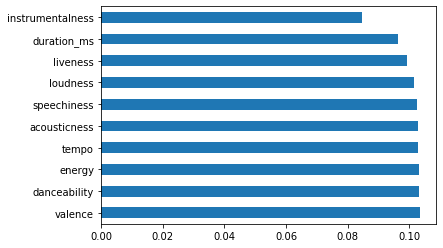

In [9]:
data = acoustic_features.drop(columns=['time_signature', 'mode', 'key', 'genre', 'artist_name', 'track_name', 'track_name', 'track_id'])
with pd.option_context("display.max_columns", 20):
	print(data.head())
X = data.iloc[:,1:]  #independent columns
y = data.iloc[:,0]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = X**2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

              Specs         Score
2       duration_ms  9.973340e+14
8             tempo  1.186944e+07
6          loudness  9.676491e+06
0      acousticness  2.407541e+04
7       speechiness  2.168389e+04
4  instrumentalness  1.517822e+04
5          liveness  7.512674e+03
3            energy  3.112195e+03
1      danceability  2.038469e+03
9           valence  6.553489e+02


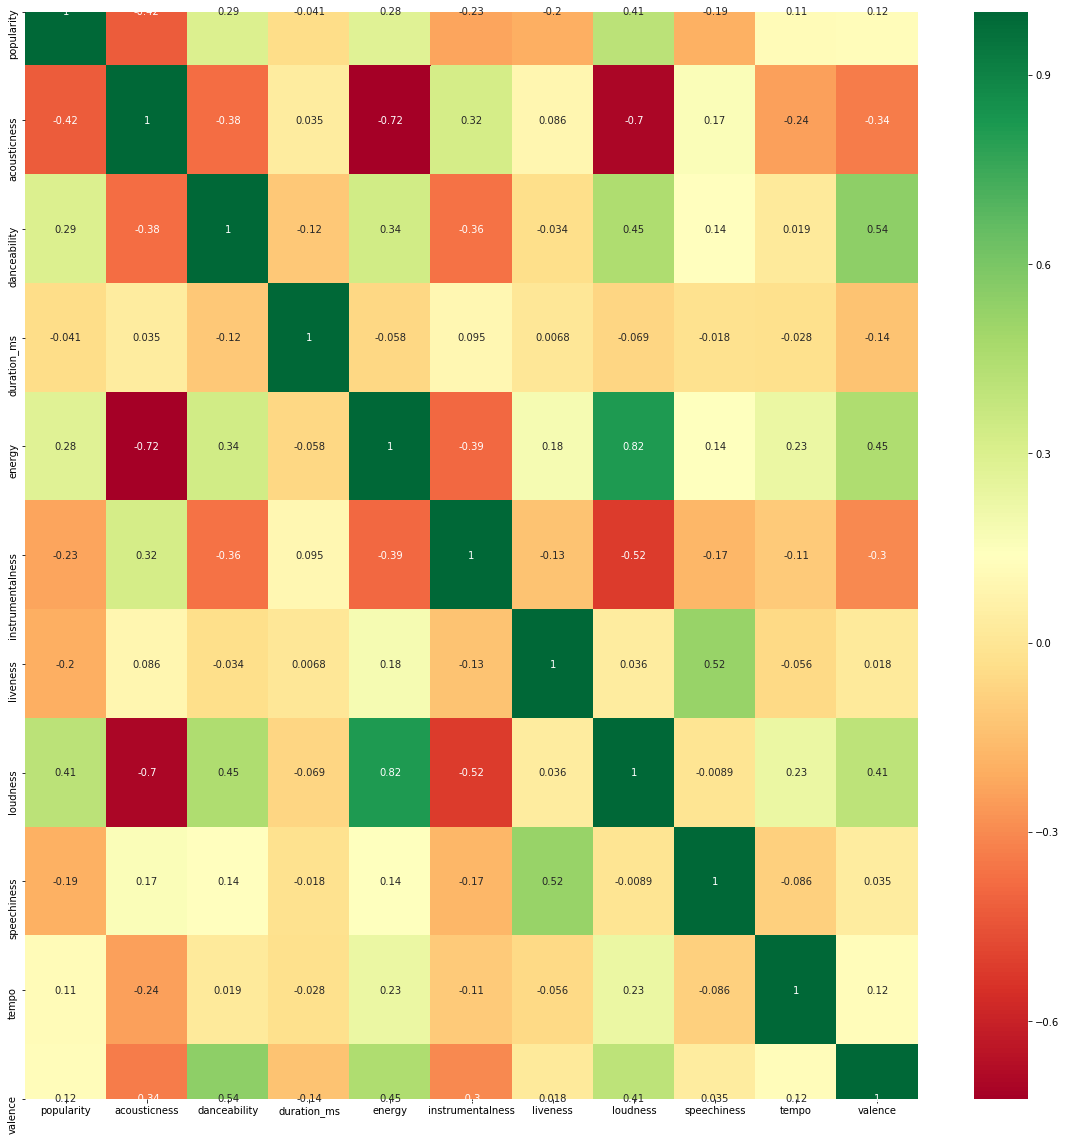

In [12]:
import seaborn as sns

#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")